In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import sys
sys.path.append('/home/aliche/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')
from scipy.io import savemat,loadmat

In [3]:
from signale.tools import locate
import numpy as np
import matplotlib.pyplot as pl
import cPickle as pkl
import scipy.signal as scsig
import signale.tools as tools
import os
import itertools
import pandas as pd
import seaborn as sns
from os import path
import scipy as sp

/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/NeuroTools/analysis.py:34: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aliche/anaconda3/envs/py27/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aliche/anaconda3/envs/py27/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aliche/anaconda3/envs/

/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Linear Track

In [4]:
for item in locate('awakeReplays-*RO.db','/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/'):
    dbName = path.join(item[0],item[1])
    group = dbName.split('/')[-4]
    dday  = dbName.split('/')[-1].split('-')[-2]
    anID  = dbName.split('/')[-1].split('-')[-3]
    RtName = [path.join(ijk[0],ijk[1])for ijk in locate('Rt*.nparr','/home/aliche/ownCloud/') if (path.join(ijk[0],ijk[1]).find('Rat'+anID)>0 and path.join(ijk[0],ijk[1]).find(dday)>0)][0]
    LtName = [path.join(ijk[0],ijk[1])for ijk in locate('Lt*.nparr','/home/aliche/ownCloud/' ) if (path.join(ijk[0],ijk[1]).find('Rat'+anID)>0 and path.join(ijk[0],ijk[1]).find(dday)>0)][0]
    try:
        RtName = [path.join(ijk[0],ijk[1])for ijk in locate('Rt*.nparr','/home/aliche/ownCloud/') if (path.join(ijk[0],ijk[1]).find('Rat'+anID)>0 and path.join(ijk[0],ijk[1]).find(dday)>0)][0]
        LtName = [path.join(ijk[0],ijk[1])for ijk in locate('Lt*.nparr','/home/aliche/ownCloud/') if (path.join(ijk[0],ijk[1]).find('Rat'+anID)>0 and path.join(ijk[0],ijk[1]).find(dday)>0)][0]
        spkName = [path.join(item[0],item[1])for item in locate('placeCells.spk','/home/aliche/dataWork/ali/MECLesion_SleepData/') 
                   if ((path.join(item[0],item[1]).find((dday[0]+'ay'+dday[-1]))>0) and (path.join(item[0],item[1]).find(anID)>0))][0]
        trjName = [path.join(item[0],item[1])for item in locate('linearTrack_Trajectory.traj','/home/aliche/dataWork/ali/MECLesion_SleepData/')
                   if ((path.join(item[0],item[1]).find((dday[0]+'ay'+dday[-1]))>0) and (path.join(item[0],item[1]).find(anID)>0))][0]
        loadFiles = True
        
    except:
        print anID
        loadFiles = False
    
    ########
    if loadFiles:
        print dbName
        print spkName
        print trjName
        print '----------------------------'
        awro = pkl.load(open(dbName))
        awro = awro[(awro.lSub>4)|(awro.rSub>4)]#awro[np.logical_not(np.isnan(awro.Lcorr))|np.logical_not(np.isnan(awro.Lcorr))]
        Rtemp = pkl.load(open(RtName))
        Ltemp = pkl.load(open(LtName))
        spk = pkl.load(open(spkName))
        spk.changeTimeUnit('ms')
        duration = awro.tf-awro.ti
        session = 'linearTrack'
        popVector = []
        popVector_raw = []
        for idx,row in awro.iterrows():
            ti = row.ti
            tf = row.tf
            NormalizedTimes = []
            Times = []
            try:
                spkCut= spk.time_slice(ti,tf)
                for zug in spkCut:
                    NormalizedTimes.append((zug.spike_times-row.ti)/duration[idx])
                    Times.append((zug.spike_times))
                popVector.append(NormalizedTimes)
                popVector_raw.append(Times)
            except Exception:
                popVector.append(np.ones_like(spk.id_list)*np.nan)
                print anID,idx,tf-ti
        data={'Rtemplate':Rtemp,'Ltemplate':Ltemp,'Rat'+anID: popVector_raw}
        savemat('/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/replay_DataSet/All_spikes/lesion/Rat'+anID+'-'+dday+'-'+session+'.mat',data)    
        #if len(popVector):
        #    popVector = np.array(popVector)
        #    binPop = popVector>0
        #    nActive = binPop.sum(axis=1)
        #    print dbName.split('/')[-1],data['Ltemplate'].size,data['Rtemplate'].size,'--------------',popVector.shape[0],(nActive>4).sum()#,sigCounter(awro)

/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3838Lesion/dataFiles/awakeReplays-3838-D3-RO.db
/home/aliche/dataWork/ali/MECLesion_SleepData/Marta/Rat3838/LinearTrack_02-03-16_Day3/parrentData/placeCells.spk
/home/aliche/dataWork/ali/MECLesion_SleepData/Marta/Rat3838/LinearTrack_02-03-16_Day3/parrentData/linearTrack_Trajectory.traj
----------------------------
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3838Lesion/dataFiles/awakeReplays-3838-D2-RO.db
/home/aliche/dataWork/ali/MECLesion_SleepData/Marta/Rat3838/LinearTrack_02-02-16_Day2/parrentData/placeCells.spk
/home/aliche/dataWork/ali/MECLesion_SleepData/Marta/Rat3838/LinearTrack_02-02-16_Day2/parrentData/linearTrack_Trajectory.traj
----------------------------
/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3838Lesion/dataFiles/awakeReplays-3838-D1-RO.db
/home/aliche/dataWork/ali/MECLesion_SleepData/Marta/Rat3838/LinearTrack_02-01-16_Day1/parrentData/

ImportError: No module named indexes.base

In [ ]:
np.min([unit[0] for unit in popVector_raw[0] if unit.size]),np.max([unit[-1] for unit in popVector_raw[0] if unit.size])

# Sleeeeeeeeeeeeeeeep

In [67]:
spk_list = [path.join(item[0],item[1])for item in locate('placeCells.spk','/home/aliche/dataWork/ali/MECLesion_SleepData/')]
thBin_list = [path.join(ijk[0],ijk[1])for ijk in locate('thBins.npArr','/home/aliche/dataWork/ali/MECLesion_SleepData/')]

In [ ]:
dbList = [item for item in locate('*roDB-D*.db','/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control') if not item[1].endswith('g.db')][:]
for item in dbList[:]:
    dbName = path.join(item[0],item[1])
    group = dbName.split('/')[-4]
    dday  = dbName.split('/')[-1].split('-')[-1].split('.')[0]
    anID  = dbName.split('/')[-1].split('-')[0]
    #RtName = [path.join(ijk[0],ijk[1])for ijk in locate('Rt*.nparr','/home/chenani/ownCloud/') if (path.join(ijk[0],ijk[1]).find('Rat'+anID)>0 and path.join(ijk[0],ijk[1]).find(dday)>0)][0]
    #LtName = [path.join(ijk[0],ijk[1])for ijk in locate('Lt*.nparr','/home/chenani/ownCloud/') if (path.join(ijk[0],ijk[1]).find('Rat'+anID)>0 and path.join(ijk[0],ijk[1]).find(dday)>0)][0]
    try:
        RtName = [path.join(ijk[0],ijk[1])for ijk in locate('Rt*.nparr','/home/aliche/ownCloud/') \
                  if (path.join(ijk[0],ijk[1]).find('Rat'+anID)>0 and path.join(ijk[0],ijk[1]).find(dday)>0)][0]
        LtName = [path.join(ijk[0],ijk[1])for ijk in locate('Lt*.nparr','/home/aliche/ownCloud/')\
                  if (path.join(ijk[0],ijk[1]).find('Rat'+anID)>0 and path.join(ijk[0],ijk[1]).find(dday)>0)][0]
        spkName = [item for item in spk_list if (item.find((dday[0]+'ay'+dday[-1]))>0 and (item.find(anID)>0))][0]
        #trjName = [path.join(item[0],item[1])for item in locate('linearTrack_Trajectory.traj','/home/aliche/dataWork/ali/MECLesion_SleepData/')
        #           if ((path.join(item[0],item[1]).find((dday[0]+'ay'+dday[-1]))>0) and (path.join(item[0],item[1]).find(anID)>0))][0]
        HFEdb = [path.join(ijk[0],ijk[1])for ijk in locate('*-RipplesTimeDB-SKLRN.pd','/home/aliche/ownCloud/') \
                  if (path.join(ijk[0],ijk[1]).find('Rat'+anID)>0 )][0]
        thetaTimeBins_pth = [ item for item in thBin_list if ((item.find((dday[0]+'ay'+dday[-1]))>0) and (item.find(anID)>0))][0]
        thR0_pth = [path.join(ijk[0],ijk[1])for ijk in locate('*-theta.R0','/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/') \
                   if((path.join(ijk[0],ijk[1]).find((dday[0]+'ay'+dday[-1]))>0) and (path.join(ijk[0],ijk[1]).find(anID)>0))][0]
        loadFiles = True
        rippDB = pd.read_pickle(HFEdb)
        if anID =='434':
            print RtName,LtName
    except Exception as e:
        print e
        print dbName.split('/')[-1],anID,dday
        print RtName, '\n',LtName,'\n',spkName,'\n',HFEdb,'\n',thetaTimeBins_pth,'\n',thR0_pth
        loadFiles = False
    
    ########
    if loadFiles:
        print dbName
        #print spkName
        #print trjName
        #print '----------------------------'
        thR0 = pkl.load(open(thR0_pth,'rb'))[1]
        thetaTimeBins = pkl.load(open(thetaTimeBins_pth,'rb'))
        lMax_PRE =  sp.signal.argrelextrema(thR0[0], np.greater)
        lMax_POST =  sp.signal.argrelextrema(thR0[1], np.greater)
        lBigMacPRE  = lMax_PRE[0][np.where(((thR0[0][lMax_PRE] - thR0[0].mean())/ thR0[0].std())>3)[0]]
        lBigMacPOST = lMax_POST[0][np.where(((thR0[1][lMax_POST] - thR0[1].mean())/ thR0[1].std())>3)[0]]
        thTimeStamps_PRE  = pd.rolling_mean(thetaTimeBins[0],2)[1:]#*1e-3
        thTimeStamps_POST = pd.rolling_mean(thetaTimeBins[2],2)[1:]#*1e-3
        rippDB = pd.read_pickle(HFEdb)
        rippDB = rippDB[rippDB.date=='day'+dday[-1]]
        popro = pd.read_pickle(dbName)
        popro = popro[(popro.lSub>4)|(popro.rSub>4)]#awro[np.logical_not(np.isnan(awro.Lcorr))|np.logical_not(np.isnan(awro.Lcorr))]
        Rtemp = pkl.load(open(RtName))
        Ltemp = pkl.load(open(LtName))
        #print Rtemp.size,Ltemp.size
        spk = pkl.load(open(spkName))
        spk.changeTimeUnit('ms')
        duration = popro.t_end-popro.t_start
        print 't_start_diff: %4f' %(spk.t_start - thTimeStamps_PRE[0])
        if np.abs(spk.t_start - thTimeStamps_PRE[0])>1000:
            print spk.t_start,thTimeStamps_PRE[0]
        print 't_stop_diff: %4f'%(spk.t_stop - thTimeStamps_POST[-1])
        if np.abs(spk.t_stop - thTimeStamps_POST[-1])>1000:
            print spk.t_stop,thTimeStamps_POST[-1]
        print set(popro.session)
        for session in set(popro.session):
            data = {}
            popVector = []
            popVector_raw = []
            epochs = []
            HFEtags = []
            df = popro[popro.session==session]
            ExpDay = np.unique(popro.date)[0]
            counter = 0
            for idx,row in df.iterrows():
                counter +=1
                ti = row.t_start*1e3
                tf = row.t_end*1e3
                tp = row.t_peak
                NormalizedTimes = []
                Times = []
                selIdx = np.square(rippDB.t_peak/1e3 - row.t_peak).argmin()
                if np.abs(row.t_peak-rippDB.t_peak[selIdx]/1e3)<0.15:
                    if rippDB.wc[selIdx] == 300:
                        HFEtags.append('SWR')
                    elif rippDB.wc[selIdx] == 100:
                        HFEtags.append('FGB')
                    else:
                        HFEtags.append(np.nan)
                else:
                    HFEtags.append(np.nan)
                try:
                    spkCut= spk.time_slice(ti,tf)
                    for zug in spkCut:
                        NormalizedTimes.append((zug.spike_times.mean()-popro.t_start.loc[idx]*1e3)/duration[idx])
                        Times.append(zug.spike_times)
                    popVector.append(NormalizedTimes)
                    popVector_raw.append(Times)
                    epochs.append(row.epoch)
                except Exception:
                    popVector.append(np.ones_like(spk.id_list)*np.nan)
                    epochs.append(row.epoch)
                    print anID,counter,idx,tf-ti,df.index[-1]
            #print 100.0*np.where(np.array(HFEtags)=='nan')[0].size/len(HFEtags)
            if session in ['sleep01','sleep05','PRE']:
                data={'Rtemplate':Rtemp,'Ltemplate':Ltemp,'epochs': np.array(epochs),'HFE_tags':np.array(HFEtags),
                      'Rat'+anID: popVector_raw,'PCA_R0_PRE':thTimeStamps_PRE[lBigMacPRE]}
            else:
                data={'Rtemplate':Rtemp,'Ltemplate':Ltemp,'epochs': np.array(epochs),'HFE_tags':np.array(HFEtags),
                      'Rat'+anID: popVector_raw,'PCA_R0_POST':thTimeStamps_POST[lBigMacPOST]}
            savemat('/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/replay_DataSet/All_spikes/control/Rat'+anID+'-'+dday+'-'+session+'.mat',data)  
    

In [ ]:
[len(item) for item in thetaTimeBins],[len(item) for item in thR0]
#spk.t_stop-thetaTimeBins[2][-1]
#dbList
#thetaTimeBins[2][-1],spk.time_axis(100)
#[item for item in dbList if item[0].find('3754')>0]
#pd.read_pickle(HFEdb)
thR0_pth

In [14]:
import scipy as sp
roDB = pd.read_pickle('/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3661Control/dataFiles/sleepDB/3661-popDB-D1-Chsig.db')
thBins = pkl.load(open('/home/aliche/dataWork/ali/MECLesion_SleepData/Marta/Rat3661/LinearTrack_03-03-15Day1/parrentData/thBins.npArr','rb'))
zug = pkl.load(open('/home/aliche/dataWork/ali/MECLesion_SleepData/Marta/Rat3656/LinearTrack_03-03-2015_Day1/parrentData/FiringUnits.spk','rb'))
thR0   = pkl.load(open('/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3661-Day1-theta.R0','rb'))[1]
thRl   = pkl.load(open('/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat3661-Day1-theta.Rl','rb'))[1]
lMax_PRE =  sp.signal.argrelextrema(thR0[0], np.greater)
lMax_POST =  sp.signal.argrelextrema(thR0[1], np.greater)
lBigMacPRE  = lMax_PRE[0][np.where(((thR0[0][lMax_PRE] - thR0[0].mean())/ thR0[0].std())>3)[0]]
lBigMacPOST = lMax_POST[0][np.where(((thR0[1][lMax_POST] - thR0[1].mean())/ thR0[1].std())>3)[0]]
#sns.kdeplot(((thR0[0] - thR0[0].mean())/ thR0[0].std())[lBigMacPRE],cumulative=True,label='PRE')
#sns.kdeplot(((thR0[1] - thR0[1].mean())/ thR0[1].std())[lBigMacPOST],cumulative=True,label='POST')
thTimeStamps_PRE  = pd.rolling_mean(thBins[0],2)[1:]*1e-3
thTimeStamps_POST = pd.rolling_mean(thBins[2],2)[1:]*1e-3
stds_PRE = np.std(thRl[0],axis=1)
avgs_PRE = np.mean(thRl[0],axis=1)
stds_POST = np.std(thRl[1],axis=1)
avgs_POST = np.mean(thRl[1],axis=1)
popMoments_PRE = []
popMoments_POST = []
timeDiff_PRE = []
timeDiff_POST = []
for idx,row in roDB[roDB.session=='PRE'].iterrows():
    tp = row.t_peak
    iIdx, thT = tools.findNearest(thTimeStamps_PRE,tp)
    timeDiff.append(tp-thT)
    if np.where(lBigMacPRE==iIdx)[0].size:
        popMoments_PRE.append(thR0[0][iIdx])
        timeDiff_PRE.append(tp-thT)
        #popMoments_PRE.append(np.array([(thRl[0][ii][iIdx] - avgs_PRE[ii])/stds_PRE[ii] for ii in range(10)]).max())
for idx,row in roDB[roDB.session=='POST'].iterrows():
    tp = row.t_peak
    iIdx, thT = tools.findNearest(thTimeStamps_POST,tp)
    timeDiff.append(tp-thT)
    if np.where(lBigMacPOST==iIdx)[0].size:
        popMoments_POST.append(thR0[1][iIdx])
        timeDiff_POST.append(tp-thT)
    #popMoments_POST.append(np.array([(thRl[1][ii][iIdx] - avgs_POST[ii])/stds_POST[ii] for ii in range(10)]).max())
        
popMoments_PRE = np.array(popMoments_PRE)
popMoments_POST = np.array(popMoments_POST)
sns.kdeplot(timeDiff,cumulative=True)
sns.kdeplot(timeDiff_PRE,cumulative=True)
sns.kdeplot(timeDiff_POST,cumulative=True)

/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  del sys.path[0]
/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  


NameError: name 'timeDiff' is not defined

(-0.05, 1.05)

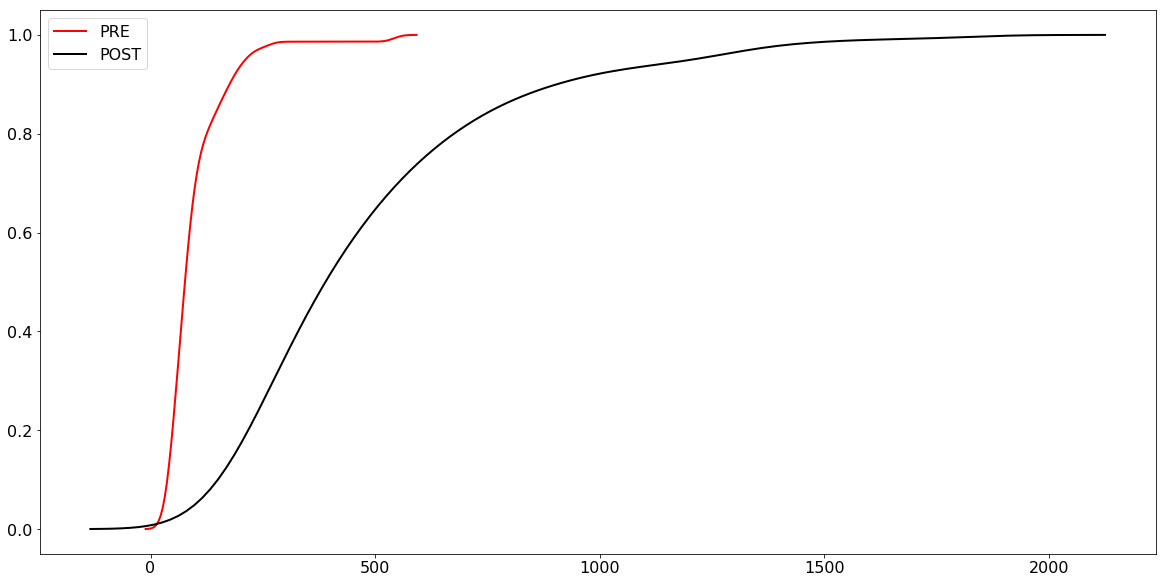

In [122]:
f,ax = pl.subplots(1,1,figsize=[20,10])
ppM = popMoments_PRE[:]
sns.kdeplot(ppM,cumulative=True,label='PRE',color='r')
ppM = popMoments_POST[:]
sns.kdeplot(ppM,cumulative=True,label='POST',color='k')
#pl.xlim(-5,5)
pl.ylim(-0.05,1.05)
#sns.kdeplot(r00[np.abs(r00)<20])

In [56]:
np.abs(thTimeStamps-5765771.5).argmin()
#roDB[roDB.session=='sleep02'].t_peak*1 - 
#thBins[0][1000]
#roDB
roDB[roDB.session=='POST']#.t_start[0],roDB.t_end[1000],thTimeStamps[0],thTimeStamps[-1]

,t_start,t_end,peak_value,t_peak,Lcorr,Rcorr,Rpv,tSub,lSub,rSub,epoch,date,session,animal
2807,5480.4535,5480.5725,0.006701,5480.5295,0.257143,0.500000,0.0,7.0,6.0,5.0,NA,03-03-15Day1,POST,Rat3661
2808,5484.1845,5484.3465,0.005851,5484.2195,-0.700000,-0.200000,0.0,5.0,5.0,4.0,rem,03-03-15Day1,POST,Rat3661
2812,5486.1985,5486.2835,0.003685,5486.2525,0.000000,NaN,0.0,5.0,5.0,3.0,rem,03-03-15Day1,POST,Rat3661
2824,5489.9765,5490.2595,0.005592,5490.0965,0.214286,-0.100000,0.0,7.0,7.0,5.0,rem,03-03-15Day1,POST,Rat3661
2845,5509.8245,5509.9205,0.007068,5509.8505,-0.828571,-0.892857,1.0,9.0,6.0,7.0,rem,03-03-15Day1,POST,Rat3661
2855,5517.4115,5517.5105,0.012175,5517.4695,-0.261905,-0.452381,0.0,10.0,8.0,8.0,rem,03-03-15Day1,POST,Rat3661
2859,5520.4455,5520.5155,0.008588,5520.4815,-0.300000,0.000000,0.0,5.0,5.0,4.0,rem,03-03-15Day1,POST,Rat3661
2864,5524.0575,5524.1565,0.009956,5524.1085,-0.357143,-0.800000,0.0,8.0,7.0,4.0,rem,03-03-15Day1,POST,Rat3661
2871,5528.3145,5528.4525,0.005077,5528.3825,-0.657143,0.400000,0.0,6.0,6.0,4.0,rem,03-03-15Day1,POST,Rat3661
2888,5537.6965,5537.8545,0.013041,5537.7955,-0.703297,-0.769697,1.0,15.0,13.0,10.0,rem,03-03-15Day1,POST,Rat3661


## Special Cases

In [70]:
dataFolder = '/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat616Control/dataFiles/'
animalPath = '/home/aliche/dataWork/ali/MECLesion_SleepData/Magda/Rat616Control/LinearTrack_2013-06-02_Day1/parrentData/'
dday = 'LT4'
RName = 'Rtemplate'+dday+'.nparr'
LName = 'Ltemplate'+dday+'.nparr'
thetaTimeBins_pth = '/home/aliche/dataWork/ali/MECLesion_SleepData/Magda/Rat616Control/LinearTrack_2013-06-02_Day1/parrentData/thBins.npArr'
thR0_pth = '/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/PCA_MEC/DATA/Rat616-Day1-theta.R0'
DBAW_name = 'awakeReplays-616-LT4-RO.db'
DBfileName = 'sleepDB/616-roDB-D1.db'#'awakeReplays-616-'+dday+'.db'#'awakeReplays-3906-D1.db'
print RName,DBfileName

RtemplateLT4.nparr sleepDB/616-roDB-D1.db


In [77]:
animal = dataFolder.split('/')[-3]
spikeZug = pkl.load(open(animalPath+'placeCells.spk'))
spikeZug.changeTimeUnit('ms')
#popDB = pd.read_pickle(dataFolder+ '3838-popDB-D4.db')
popDB = pd.read_pickle(dataFolder+ DBAW_name)
popDB = popDB[(popDB.lSub>4)|(popDB.rSub>4)]
Rtemplate = pkl.load(open(dataFolder+RName))
Ltemplate = pkl.load(open(dataFolder+LName))
popDB = popDB[popDB.tSub>3]
duration = (popDB.ti-popDB.tf)
ExpDay = DBfileName.split('.')[0].split('-')[-1]
session = 'linearTrack'
popVector = []
for idx,row in popDB.iterrows():
    ti = row.ti
    tf = row.tf
    NormalizedTimes = []
    Times = []
    try:
        spkCut= spikeZug.time_slice(ti,tf)
        for zug in spkCut:
            NormalizedTimes.append((zug.spike_times.mean()-row.ti)/duration[idx])
            Times.append(Times)
        popVector.append(NormalizedTimes)
    except Exception:
        print idx,tf-ti
data={'Rtemplate':Rtemp,'Ltemplate':Ltemp,'Rat614': popVector_raw}
savemat('/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/replay_DataSet/All_spikes/control/'+animal+'-'+ExpDay+'-'+session+'.mat',data)    
print animal+'-'+ExpDay+'-'+session+'.mat'
if len(popVector):
    popVector = np.array(popVector)
    binPop = popVector>0
    nActive = binPop.sum(axis=1)
    print DBfileName.split('/')[-1],session,data['Ltemplate'].size,data['Rtemplate'].size,'--------------',popVector.shape[0],(nActive>4).sum()

Rat616Control-D1-linearTrack.mat
616-roDB-D1.db linearTrack 11 13 -------------- 8 0


/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice.
/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater


In [78]:
animal = dataFolder.split('/')[-3]
spikeZug = pkl.load(open(animalPath+'placeCells.spk'))
spikeZug.changeTimeUnit('ms')
popDB = pd.read_pickle(dataFolder+ DBfileName)
Rtemplate = pkl.load(open(dataFolder+RName))
Ltemplate = pkl.load(open(dataFolder+LName))
popDB = popDB[(popDB.lSub>4)|(popDB.rSub>4)]
HFEdb = pd.read_pickle('/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat616Control/dataFiles/sleepDB/Rat616Control-RipplesTimeDB-SKLRN.pd')
duration = 1e3*(popDB.t_end-popDB.t_start)
thR0 = pkl.load(open(thR0_pth,'rb'))[1]
thetaTimeBins = pkl.load(open(thetaTimeBins_pth,'rb'))
lMax_PRE =  sp.signal.argrelextrema(thR0[0], np.greater)
lMax_POST =  sp.signal.argrelextrema(thR0[1], np.greater)
lBigMacPRE  = lMax_PRE[0][np.where(((thR0[0][lMax_PRE] - thR0[0].mean())/ thR0[0].std())>3)[0]]
lBigMacPOST = lMax_POST[0][np.where(((thR0[1][lMax_POST] - thR0[1].mean())/ thR0[1].std())>3)[0]]
thTimeStamps_PRE  = pd.rolling_mean(thetaTimeBins[0],2)[1:]#*1e-3
thTimeStamps_POST = pd.rolling_mean(thetaTimeBins[2],2)[1:]#*1e-3
for session in set(popDB.session):
    data = {}
    popVector = []
    popVector_raw = []
    epochs = []
    HFEtags = []
    df = popDB[popDB.session==session]
    ExpDay = np.unique(popDB.date)[0]
    for idx,row in df.iterrows():
        ti = row.t_start*1e3
        tf = row.t_end*1e3
        NormalizedTimes = []
        Times = []
        selIdx = np.square(HFEdb.t_peak/1e3 - row.t_peak).argmin()
        if np.abs(row.t_peak-HFEdb.t_peak[selIdx]/1e3)<0.15:
            if HFEdb.wc[selIdx] == 300:
                HFEtags.append('SWR')
            elif HFEdb.wc[selIdx] == 100:
                HFEtags.append('FGB')
            else:
                HFEtags.append(np.nan)
        else:
            HFEtags.append(np.nan)
        try:
            #print ti,tf
            spkCut= spikeZug.time_slice(ti,tf)
            for zug in spkCut:
                NormalizedTimes.append((zug.spike_times.mean()-popDB.t_start.loc[idx]*1e3)/duration[idx])
                Times.append(zug.spike_times)
            popVector.append(NormalizedTimes)
            popVector_raw.append(Times)
            epochs.append(row.epoch)
        except Exception:
            popVector.append(np.ones_like(spk.id_list)*np.nan)
            epochs.append(row.epoch)
            print anID,counter,idx,tf-ti,df.index[-1]
    print 100.0*np.where(np.array(HFEtags)=='nan')[0].size/len(HFEtags)
    if session in ['sleep01','sleep05','PRE']:
        data={'Rtemplate':Rtemp,'Ltemplate':Ltemp,'epochs': np.array(epochs),'HFE_tags':np.array(HFEtags),
              'Rat'+anID: popVector_raw,'PCA_R0_PRE':thTimeStamps_PRE[lBigMacPRE]}
        print 'pop',len(popVector_raw)
        print lBigMacPRE.size
    else:
        data={'Rtemplate':Rtemp,'Ltemplate':Ltemp,'epochs': np.array(epochs),'HFE_tags':np.array(HFEtags),
              'Rat'+anID: popVector_raw,'PCA_R0_POST':thTimeStamps_POST[lBigMacPOST]}       
        print 'pop',len(popVector_raw)
        print 'pca',lBigMacPOST.size
    savemat('/home/aliche/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/replay_DataSet/All_spikes/control/'+animal+'-'+ExpDay+'-'+session+'.mat',data)   
    print animal+'-'+ExpDay+'-'+session+'.mat'
    if len(popVector):
        popVector = np.array(popVector)
        binPop = popVector>0
        nActive = binPop.sum(axis=1)

        print DBfileName.split('/')[-1],session,data['Ltemplate'].size,data['Rtemplate'].size,'--------------',popVector.shape[0],(nActive>4).sum()

/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  app.launch_new_instance()
/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:31: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice.


3.75
pop 80
pca 78
Rat616Control-Day1-sleep02.mat
616-roDB-D1.db sleep02 11 13 -------------- 80 80
16.6666666667
pop 6
12
Rat616Control-Day1-sleep01.mat
616-roDB-D1.db sleep01 11 13 -------------- 6 6


/home/aliche/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in greater


In [76]:
data

{'Ltemplate': array([11,  2,  5, 10,  4,  8,  6,  1,  3, 12,  7]),
 'Rat614': [[array([], dtype=float32),
   array([829586.56], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([829592.7], dtype=float32),
   array([], dtype=float32),
   array([829563.9], dtype=float32),
   array([829570.4], dtype=float32),
   array([829586.9], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32)],
  [array([905195.06, 905214.75], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=float32),
   array([], dtype=f

In [53]:
spikeZug.time_slice(ti,tf).id_list, spikeZug.id_list

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]))

In [20]:
matPaths = [os.path.join(item[0],item[1]) for item in locate('*.mat','/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/replay-Motif-dataSet/')]

In [21]:
for item in sorted(matPaths):
    if (item.find('7Lesion-')>0 and item.find('linearTrack')>0):
        dic = loadmat(item)
        anName = [key for key in  dic.keys() if key.find('Rat')>=0][0]
        popV = dic[anName]
        #################
        binPop = popV>0
        nActive = binPop.sum(axis=1)
        print item.split('/')[-1],anName,dic['Ltemplate'][0].size,dic['Rtemplate'][0].size,'--------------',popV.shape[0],(nActive>4).sum()

In [15]:
popVector_raw

[]

In [19]:
df

,t_start,t_end,peak_value,t_peak,Lcorr,Rcorr,Lpv,Rpv,tSub,lSub,rSub,epoch,date,session,animal
171,829.563,829.625,0.004721,829.592,-0.3,-0.800000,1.0,1.0,5.0,5.0,4.0,rem,Day1,sleep01,Rat616Control
235,905.156,905.267,0.006157,905.228,NaN,0.300000,1.0,1.0,5.0,1.0,5.0,rem,Day1,sleep01,Rat616Control
355,1040.942,1041.090,0.004590,1041.070,NaN,-0.321429,1.0,1.0,7.0,3.0,7.0,rem,Day1,sleep01,Rat616Control
473,1187.656,1187.717,0.008235,1187.685,NaN,-0.300000,1.0,1.0,6.0,3.0,5.0,sws,Day1,sleep01,Rat616Control
480,1198.407,1198.484,0.006193,1198.457,NaN,-0.500000,1.0,1.0,5.0,3.0,5.0,sws,Day1,sleep01,Rat616Control
539,1259.234,1259.289,0.004392,1259.263,NaN,-0.600000,1.0,1.0,5.0,3.0,5.0,rem,Day1,sleep01,Rat616Control


In [15]:
for item in locate('*roDB*.db','/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/'):
    dbName = path.join(item[0],item[1])
    if dbName.find('8-roDB-D3')>0:
        df = pd.read_pickle(dbName)

In [7]:
pkl.load(open(spk_list[0]))